# ***Importing Libaries***

In [59]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.cluster import Birch
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data =  pd.read_csv("/content/drive/MyDrive/University of Windsor/npm_awsPackages - npm_awsPackages.csv")


# ***Analysis To clean the Data***

In [3]:
def fixData(data):
  result = pd.DataFrame()
 
  for i in range(len(data)):
    tempArray = []
    tempDict = {}
    for j in range(len(data.iloc[0])):
      if str(data.iloc[i,j])[0] in {"0","1","2","3","4","5","6","7","8","9"}: 
        tempArray.append(str(data.iloc[i,j]))
    if len(tempArray) >= 6:
      for k in range(len(tempArray)):
        tempDict[str(k)] = [tempArray[k]]
      newTemp = pd.DataFrame(tempDict)
      result = result.append(newTemp)
      
  return result

def findUncleanValue(dataList,columnName):
  array  = list(dataList[columnName].unique())
  i = 0
  while(i < len(array)):
    if str(array[i])[0] in ["1","2","3","4","5","6","7","8","9"]:
      array.pop(i)
    else:
      i += 1
      
  value = []
  for i in range(len(array)):
    value.append(dataList.index[dataList[columnName] == array[i]].tolist())
  
  value = [i for j in value for i in j ]
  
  return value

def cantStopCleaning(dataList,value): 
  for i in range(len(value)):
    if value[i] in [278,367,511,670]:
      dataList.iloc[value[i],1:] = dataList.iloc[value[i],1:].shift(-1,axis = 0)
    elif value[i] in [1006]:
      dataList.iloc[value[i],3:] = dataList.iloc[value[i],3:].shift(-1,axis = 0)
    elif value[i] in [1021,1068,4372,4612,2457,2828,4496,3514,3566]:
      dataList.iloc[value[i],3:] = dataList.iloc[value[i],3:].shift(-2,axis = 0)
    else:
      dataList.iloc[value[i]] = dataList.iloc[value[i]].shift(-1,axis = 0)

  return dataList

def cleanTime(dataList):

  for i in range(len(data)):
    if len(str(data.iloc[i,2])) != 1 and str(data.iloc[i,2]) != 'nan' and (str(data.iloc[i,2])[1] == " " or  str(data.iloc[i,2])[2] == " ") :
      dataList.iloc[i,0:] = dataList.iloc[i,0:].shift(-1,axis = 0)
  return dataList

In [ ]:
dataList = fixData(data)


In [ ]:
dataList = dataList.reset_index(drop = True)
value = findUncleanValue(dataList,"8")
dataList = cantStopCleaning(dataList,value)
value = findUncleanValue(dataList,"8")
dataList = dataList.drop(value,axis = 0)

***YIPPE LAMBDA and more Cleaning***

In [ ]:
dataList.to_csv("/content/drive/MyDrive/University of Windsor/npm_awsPackages - npm_awsPackages cleaned.csv")

In [ ]:
data =  pd.read_csv("/content/drive/MyDrive/University of Windsor/Post_Cleaned - latest.csv")

In [ ]:
data = data.drop(['Unnamed: 0','0','8','9','10','11','12','13','14'], axis = 'columns')

In [ ]:
data["2"] = data['2'].apply(lambda row: '14 days ago' if str(row) == '0.2208785054' or str(row) == 'nan'  else str(row) )
data["7"] = data['7'].apply(lambda row: 0 if str(row) == 'nan'  else str(row) )
data["3"] = data['3'].apply(lambda row: 0 if str(row) == 'nan'  else str(row) )

In [ ]:
# for i in range(len(data)):
#   print(str(data.iloc[i,1]).split())
#   if str(data.iloc[i,1]).split()[1] in ["hours","days","months"]:
#     data.iloc[i,7] = 0
#   else:
#     data.iloc[i,7] = 1


data["response"] = data['2'].apply(lambda row: 0 if row.split(" ")[1] in ["hours","days","months"] else 1 )

In [ ]:
data = data.drop('2',axis = 'columns')

In [ ]:
data = data.apply(pd.to_numeric)

In [ ]:
data.to_csv("/content/drive/MyDrive/University of Windsor/cleaned and perfected.csv")

# ***Explorartory Analysis***

In [47]:
data =  pd.read_csv("/content/drive/MyDrive/University of Windsor/cleaned and perfected.csv")

In [48]:
data = data.drop(['Unnamed: 0'], axis = 'columns')


In [49]:
data.iloc[list(data[data['7'] > 1.0]['7'].index),5]  = 0

In [50]:
data[data['7'] > 1.0]['7']

Series([], Name: 7, dtype: float64)

# **"From the below Graph we can see that it is possible to differentiate reponse using some of predicates"**

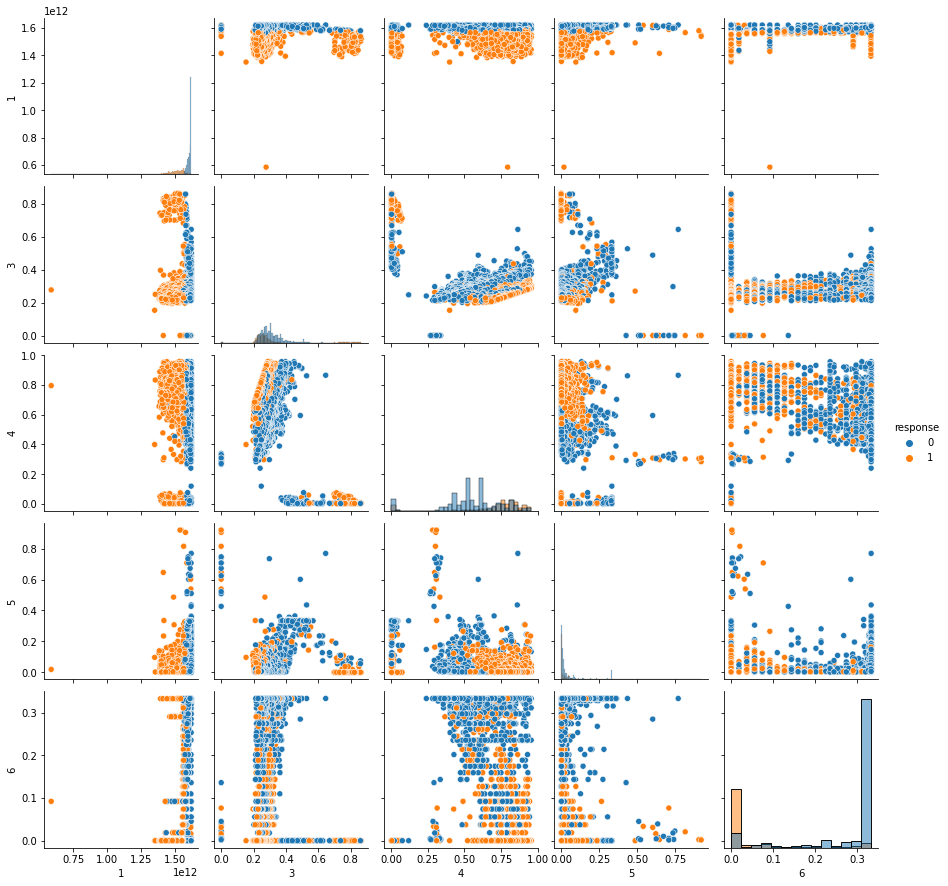

In [ ]:
sns.pairplot(data[['1','3','4','5','6','response']],hue="response", diag_kind="hist")

# **clustering Algorithm**

https://machinelearningmastery.com/clustering-algorithms-with-python/

In [51]:
model = Birch(threshold=0.01, n_clusters=3)
model.fit(data[['1','3','4','5','6','7']])
yhat = model.predict(data[['1','3','4','5','6','7']])

In [52]:
clusters = unique(yhat)

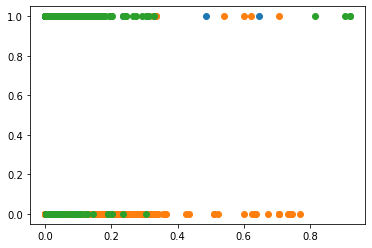

In [53]:
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	pyplot.scatter(data.iloc[row_ix[0], 3], data.iloc[row_ix[0],6])
# show the plot
pyplot.show()

# ***Predictive Modelling***

In [57]:
X = data.drop('response', axis=1)
y = data['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [63]:
y_pred = svclassifier.predict(X_test)

NotFittedError: ignored

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))